In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import scipy.io
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from keras.layers.core import Dense, Activation
import pandas
import keras

Using TensorFlow backend.


In [4]:
# attach the column names to the dataset
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]




df_1= pd.read_csv(r'C:\Users\avmas\Caps\NSL_TRAIN.csv', names = col_names )
df_2 = pd.read_csv(r'C:\Users\avmas\Caps\NSL_TEST.csv', names = col_names )

df = pandas.concat([df_1, df_2])


In [10]:
df.groupby('label')['label'].count()

label
apache2              737
back                1315
buffer_overflow       50
ftp_write             11
guess_passwd        1284
httptunnel           133
imap                  12
ipsweep             3740
land                  25
loadmodule            11
mailbomb             293
mscan                996
multihop              25
named                 17
neptune            45871
nmap                1566
normal             77054
perl                   5
phf                    6
pod                  242
portsweep           3088
processtable         685
ps                    15
rootkit               23
saint                319
satan               4368
sendmail              14
smurf               3311
snmpgetattack        178
snmpguess            331
spy                    2
sqlattack              2
teardrop             904
udpstorm               2
warezclient          890
warezmaster          964
worm                   2
xlock                  9
xsnoop                 4
xterm              

In [12]:
#split into features and outcomes

x = df.drop(['label'], axis = 1 )
y = df[['label']]

In [14]:
#turn categorical data into dummy variables 

dummies_1= pd.get_dummies(x['protocol_type'])
dummies_2 = pd.get_dummies(x['service'])
dummies_3 = pd.get_dummies(x['flag'])

x = x.drop(['protocol_type','service','flag'], axis = 1)

#x = x.join(x)

In [15]:
merged = pandas.concat([x, dummies_1], axis = 'columns')

merged[0:5]

#dummy variable trap 
merged = merged.drop(['icmp'], axis = 1)

In [17]:
merged = pandas.concat([x, dummies_2], axis = 'columns')

merged[0:5]

#dummy variable trap 

merged = merged.drop(['whois'], axis = 1)

In [18]:
merged = pandas.concat([x, dummies_3], axis = 'columns')

merged[0:5]

merged = merged.drop(['SH'], axis = 1)

In [19]:
x = merged

x = x.drop(['protocol_type','service','flag'], axis = 1)

x[0:5]

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF
0,0,491,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
#Seperate attack and normal 

y['label'] = y['label'].replace(['apache2','back','buffer_overflow', 'ftp_write', 'guess_passwd', 'httptunnel', 'imap', 'ipsweep', 'land', 'loadmodule', 'mailbomb', 'mscan', 'multihop', 'named', 'neptune', 'nmap', 'perl', 'phf', 'pod', 'portsweep', 'processtable', 'ps', 'rootkit', 'satan', 'sendmail','smurf',
                                 'snmpgetattack','snmpguess','sqlattack','teardrop','udpstorm',
                                 'warezmaster','worm','xlock','xsnoop','xterm', 'saint', 'spy', 'warezclient'], 'attack')





C:\Users\avmas\Miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [23]:
# Turn Outcomes into dummy variables 

dummies = pd.get_dummies(y['label'])

# This will turn BENIGN values into 1 being False and all malicious packets into 0 being True. 
y = dummies.values

print(y)

[[0 1]
 [0 1]
 [1 0]
 ...
 [1 0]
 [0 1]
 [1 0]]


In [24]:
# Get column names first
names = x.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit data on the scaler object
scaled_df = scaler.fit_transform(x)
new_scaled_df = pd.DataFrame(scaled_df, columns=names)

x = pd.DataFrame(new_scaled_df)

x[0:5]

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF
0,-0.112481,-0.007346,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,-0.018351,-0.33621,-0.126385,-0.026599,-0.145766,-0.574601,-0.051047,-0.030936,-0.044839,0.808391
1,-0.112481,-0.007409,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,-0.018351,-0.33621,-0.126385,-0.026599,-0.145766,-0.574601,-0.051047,-0.030936,-0.044839,0.808391
2,-0.112481,-0.007436,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,-0.018351,-0.33621,-0.126385,-0.026599,-0.145766,1.740339,-0.051047,-0.030936,-0.044839,-1.237025
3,-0.112481,-0.007394,-0.002413,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,...,-0.018351,-0.33621,-0.126385,-0.026599,-0.145766,-0.574601,-0.051047,-0.030936,-0.044839,0.808391
4,-0.112481,-0.007400,-0.004501,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,...,-0.018351,-0.33621,-0.126385,-0.026599,-0.145766,-0.574601,-0.051047,-0.030936,-0.044839,0.808391


In [25]:
#Perform PCA to reduce dimensionality of feature vector for better accuracy
#reduce from 37 to 2 dimensional space

pca=PCA(n_components = 2)
pca.fit(x)
x_scaled = pca.transform(x)
print ("Original Shape:   ", x.shape)
print ("Transformed Shape:",x_scaled.shape)

x = x_scaled

print(x)

Original Shape:    (148517, 48)
Transformed Shape: (148517, 2)
[[-1.03625355 -0.19344265]
 [ 0.14661335  0.64507319]
 [ 4.24889304 -2.11241616]
 ...
 [-2.4625801  -0.60208429]
 [-2.0234783  -0.58090504]
 [ 1.58182055  5.73660347]]


In [37]:
#Split into test and training sets. 25% test sample 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=45)


In [39]:
# Create Neural Network, with 3 hidden layers and 1 output layer being subjected to the softmax probability function
from keras.layers import Dropout
from keras import initializers
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(200, input_dim = x.shape[1], activation='relu', kernel_initializer= initializers.he_normal(seed=0.6), bias_initializer = initializers.Constant(0.1)))
model.add(Dropout(0.2))
model.add(Dense(120, input_dim = x.shape[1], activation='relu', kernel_initializer= initializers.he_normal(seed=0.6),bias_initializer = initializers.Constant(0.1), )) 
model.add(Dropout(0.2))
model.add(Dense(60, input_dim = x.shape[1], activation='relu', kernel_initializer= initializers.he_normal(seed=0.6),bias_initializer = initializers.Constant(0.1), ))
model.add(Dropout(0.2))
model.add(Dense(10, input_dim = x.shape[1], activation='relu', kernel_initializer= initializers.he_normal(seed=0.6),bias_initializer = initializers.Constant(0.1), ))
model.add(Dropout(0.2))
model.add(Dense(1, input_dim = x.shape[1], activation='relu', kernel_initializer= initializers.he_normal(seed=0),bias_initializer = initializers.Constant(0), ))
model.add(Dense(y.shape[1],activation='softmax')) #takes in an input and spits out 1D vector

adam = Adam(lr=1e-4, beta_1=0.99, beta_2=0.999)

#Add in hyper parameters
model.compile(loss='binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam' )
#Early stopping used to stop model from over or under fitting - stops when accuracy is no longer improving 
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=3, mode='auto', restore_best_weights=False, baseline=None)
#Fit the model
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=1,epochs=100)

Train on 111387 samples, validate on 37130 samples
Epoch 1/100
111387/111387 [==============================] - 11s 97us/step - loss: 0.3474 - acc: 0.8707 - val_loss: 0.2573 - val_acc: 0.8883
Epoch 2/100
111387/111387 [==============================] - 9s 83us/step - loss: 0.2698 - acc: 0.8891 - val_loss: 0.2283 - val_acc: 0.9093
Epoch 3/100
111387/111387 [==============================] - 9s 83us/step - loss: 0.2569 - acc: 0.8938 - val_loss: 0.2261 - val_acc: 0.9104
Epoch 4/100
111387/111387 [==============================] - 9s 82us/step - loss: 0.2389 - acc: 0.9007 - val_loss: 0.2135 - val_acc: 0.9110
Epoch 5/100
111387/111387 [==============================] - 9s 84us/step - loss: 0.2195 - acc: 0.9076 - val_loss: 0.2016 - val_acc: 0.9084
Epoch 6/100
111387/111387 [==============================] - 10s 87us/step - loss: 0.2081 - acc: 0.9099 - val_loss: 0.1975 - val_acc: 0.9120
Epoch 7/100
111387/111387 [==============================] - 9s 83us/step - loss: 0.2015 - acc: 0.9116 - va

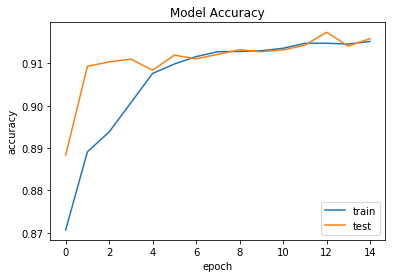

In [40]:

# plot training history
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

#show in the graph below the acurracy on both the trained and validated
#has a ever so slight increase, meaning the model could be trained longer
#to increase the accuracy of the model.It can also be seen that the model
#has not been over or under fitted as both show some comparable skill.

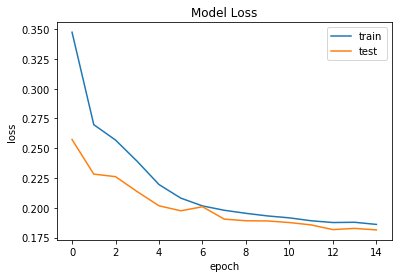

In [41]:

# plot training history
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

#show in the graph below the acurracy on both the trained and validated
#has a ever so slight increase, meaning the model could be trained longer
#to increase the accuracy of the model.It can also be seen that the model
#has not been over or under fitted as both show some comparable skill.

In [42]:
weights = model.layers[0].get_weights()[0]

biases = model.layers[0].get_weights()[1]

In [43]:
weights

array([[-0.03503396,  0.8709267 ,  0.2737518 ,  0.09282298, -0.32906413,
         0.25341365,  1.8454453 ,  0.25974485,  2.206063  , -0.89667547,
        -0.44302493, -0.531566  ,  0.9105279 , -0.40478203, -0.04028691,
        -0.32323095, -0.4454825 ,  0.27954832, -0.02460639,  0.20277047,
         0.5608061 ,  1.6105734 ,  0.2019723 ,  0.05898752,  1.6423423 ,
         1.7733572 , -1.1882242 , -1.0325686 , -0.3389097 ,  2.5448198 ,
        -0.298476  ,  1.2159299 ,  0.39369866,  0.8779292 ,  2.068683  ,
         1.7134117 ,  0.46660417, -0.20196998, -1.0446484 ,  1.0412648 ,
        -0.6603589 ,  1.9478749 , -0.05993238, -0.19604398,  1.0162355 ,
         0.08492027,  1.2013358 ,  2.2570016 ,  1.6528039 ,  0.13261668,
        -0.16201045, -0.33180115,  0.15536429,  0.03024476,  0.16672216,
         0.24363352, -0.07019254, -0.33221376,  1.6448189 , -0.92443293,
        -0.51153576, -0.375008  , -0.6392175 , -0.5517575 , -1.2481066 ,
         0.8854019 ,  1.7035073 ,  0.9489994 ,  0.9

In [44]:
biases

array([-0.556079  , -0.9193721 ,  0.91423446, -0.29985303, -0.7663214 ,
        0.3365352 , -0.41904938,  0.77288765, -1.734132  , -0.7149491 ,
       -1.2838262 , -1.0746516 , -1.0999737 ,  0.15584049,  0.5598705 ,
        0.12905672, -1.0951912 ,  0.92439777, -0.69438607,  0.7109464 ,
       -1.2816544 , -0.91818535, -0.25261635, -0.3911884 ,  0.4767139 ,
        0.31381124, -1.4127029 , -1.0518726 , -0.948446  , -0.76699674,
       -0.5953023 , -0.9196235 , -0.72913665, -0.947909  ,  0.25845242,
       -0.63501114, -0.4680686 , -0.92995286, -0.81900996, -1.5685996 ,
       -0.56675893,  0.11029211, -0.04790251, -0.9286771 , -1.0004393 ,
       -0.1960811 , -1.3354139 , -0.65820104, -1.1819546 ,  0.67738163,
       -0.60535634, -0.82394266, -0.12517764,  0.60776144,  0.67548305,
        0.85826474, -0.7737661 ,  0.1728231 ,  0.2931038 , -0.90050554,
       -1.2481524 ,  0.26738143, -1.001955  , -1.5033369 , -1.5375111 ,
       -1.0418464 , -1.1870265 , -0.93135846, -0.17384346, -0.55